# Fractal visualisation

Let $u:\mathbb{C}\mapsto\mathbb{C}$ and $v:\mathbb{C}\times\mathbb{C}\mapsto\mathbb{C}$. We consider the set of complex numbers $c$ such that the sequence
\begin{equation}
z_0=u(c) \hspace{1cm} z_{n+1}=v(z_n,c)
\end{equation}
remains bounded. In practice, a point $c$ is coloured at iteration $n$ by the real value $\frac{m}{n}$ where $m$ is the smallest $m<n$ such that $|z_m|>q$ where $q$ is an escape radius of the sequence (or $m=n$ if there is no such value).

Documentation: [here](../doc/_build/html/fractals.html)

Examples:

* The Julia set for $f:\mathbb{C}\mapsto\mathbb{C}$ is characterised by $u(c)=c$ and $v(z,c)=f(z)$ independent of $c$.
* The Mandelbrot set is characterised by $u(c)=0$ and $v(z,c)=z^2+c$

In [1]:
%autoreload 2
%pylab nbagg

import logging
logger = logging.getLogger()

from ipyshow.fractals.fractal import FractalAnimation
from itertools import islice
from functools import partial

Populating the interactive namespace from numpy and matplotlib


In [2]:
def iterfractal(gen,eradius,N,bounds):
    xb, yb = bounds
    r = (xb[1]-xb[0])/(yb[1]-yb[0])
    Nx = int(sqrt(N/r)); Ny = int(N/Nx)
    tmd,tmap = zeros((2,Nx,Ny),float)
    undecided = ones((Nx,Ny),bool)
    sel = zeros((Nx,Ny),bool)
    n = 0
    seterr(invalid='ignore')
    for z in gen((Nx,Ny),bounds):
        sel[...] = abs(z)>=eradius
        z[sel] = nan
        undecided[sel] = False
        n += 1
        tmd[...] = -tmap
        tmd[undecided] += 1
        tmap += tmd/n
        yield tmap

def IterfractalAnimation(ax,gen,bounds,eradius,N=250000,itermax=100):
    img = ax.imshow(zeros((1,1),float),vmin=0.,vmax=1.,origin='lower',extent=bounds[0]+bounds[1])
    def frames(bounds):
        return islice(((tmap,bounds) for tmap in iterfractal(gen,eradius,N,bounds)),itermax)
    def func(frm,interrupt=False):
        tmap,bounds = frm
        if interrupt:
            img.set_array(tmap)
            img.set_extent(bounds[0]+bounds[1])
        img.changed()
        return img,
    return FractalAnimation(ax,func=func,frames=frames,init_func=(lambda: None),interval=100,repeat=False)

## Examples

In [3]:
def julia(f):
    def gen(N,bounds,f=f):
        xb,yb = bounds
        Nx,Ny = N
        z = array(linspace(xb[0],xb[1],Ny),dtype=complex)[newaxis,:]+1.j*array(linspace(yb[0],yb[1],Nx),dtype=complex)[:,newaxis]
        while True:
            yield z
            z[...] = f(z)
    gen.setting = dict(bounds=((-1.5,1.5),(-1.5,1.5)),eradius=2.)
    return gen

def mandelbrot(N,bounds):
    xb,yb = bounds
    Nx,Ny = N
    c = array(linspace(xb[0],xb[1],Ny),dtype=complex)[newaxis,:]+1.j*array(linspace(yb[0],yb[1],Nx),dtype=complex)[:,newaxis]
    z = c.copy()
    while True:
        yield z
        square(z,z)
        z += c
mandelbrot.setting = dict(bounds=((-2.5,1.),(-1.,1.)),eradius=2.)

Launcher
--------

* Open a new zoom level by selecting a rectangle with the mouse (button click on one corner, keep pressed, and release on opposite corner).

* Navigate through the different zoom levels using the arrow keys on the keyboard (up or right = forward, down or left = backward)

* The zoom level is indicated in the top right corner. The precision is indicated in the top left corner. At deeper zoom levels, details start to appear at higher precision levels.

<IPython.core.display.Javascript object>


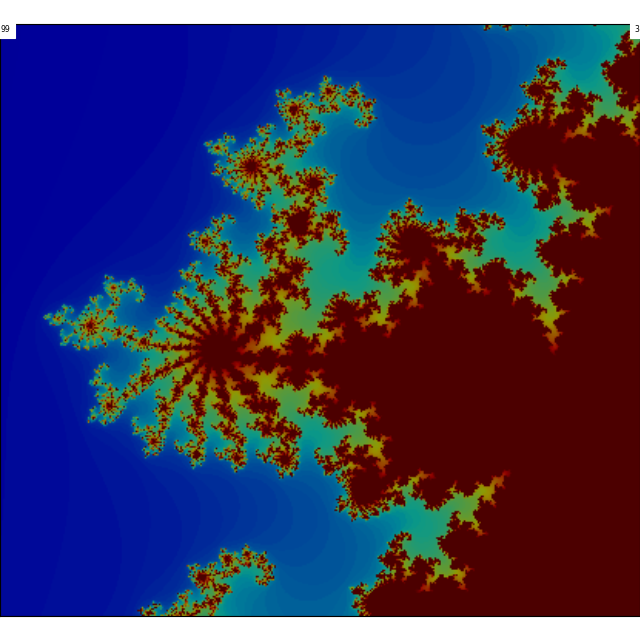

In [4]:
logger.setLevel(logging.INFO)

def test(gen,**ka):
    from matplotlib.pyplot import figure
    fig = figure(figsize=(8,8))
    ax = fig.add_axes((0,0,1,1),xticks=(),yticks=())
    for k,v in gen.setting.items(): ka.setdefault(k,v)
    return IterfractalAnimation(ax,gen,**ka)

gen = mandelbrot
#gen = julia(lambda z: square(z)-.4+.6j)
#gen = julia(lambda z: square(z)-.8+.156j)
#gen = julia(lambda z: square(z)+.285+.01j)
#gen = julia(lambda z: z*square(z)+.4)
#gen = julia(lambda z: z**7+.626)
#gen = julia(lambda z: exp(z*square(z))-.59)
#gen = julia(lambda z: exp(z*square(z))+-.621)
#gen = julia(lambda z: z-(z-1./square(z))/3.)

test(gen,N=160000,itermax=1000)